# Implementing Multinomial Logistic Regression for Multi Classification Cases in Bank-Loan Dataset

Identity:
   - Azis Muslim
   - Data Scientist

In this research we will be using loan-dataset to predict credit grade labels which consisting of label A, B, C, D, E, F, G. The purpose of this predictive research was to suggest decisions such as a lender should be giving credit or not to its borrower or it could be a consideration before arranging plan for credit expansion. To make this prediction succesful I would be using logistic regression to predict features of dependent variables that would be classified as label A, B, C, D, E, F, or G. Logistic regression was a machine learning algorithm that was quite often to be used for classification and the algorithm was simple and fast in terms of its computation. Here were the objective that will be achieved from this research
- Preparing the data and process the data from dirty to clean
- Identify the characteristics of datasets and deciding of which type of machine learning algorithm that would be implemented for classification
- Implementing Principal component analysis for high dimensional features dataset
- Grasp the concept of logistic regression for classification to interpret the result of machine learning data processing
- Evaluating the machine learning model

In [27]:
# Library that were used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import joblib 
import jsonx

In [28]:
# set_options to show all columns

pd.set_option('display.max.columns', None)

In [29]:
# pip install jsonx

In [31]:
# loading data

data_raw = pd.read_csv('loan_irish.csv')
data_raw

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,interest_payment_cat,loan_condition,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,5000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,1,Good Loan,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,2500,60 months,2,INDIVIDUAL,1,car,2,High,2,Bad Loan,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,2400,36 months,1,INDIVIDUAL,1,small_business,3,High,2,Good Loan,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,10000,36 months,1,INDIVIDUAL,1,other,4,High,2,Good Loan,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,3000,60 months,2,INDIVIDUAL,1,other,4,Low,1,Good Loan,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,10000,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,1,Good Loan,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,24000,36 months,1,INDIVIDUAL,1,home_improvement,7,Low,1,Good Loan,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,13000,60 months,2,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,12000,60 months,2,INDIVIDUAL,1,debt_consolidation,6,High,2,Good Loan,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


From  the dataset that was run above I got the information that the dataset consisted from 8.87.379 rows and 30 columns. I could assign this dataset as high dimentional dataset because it has 30 features and to simplify the analysis later on I was going to use Principal Component Analysis to reduce the dimension of the dataset.In addition this dataset was also time series.

In [32]:
# creating data_copy as a backup

data_raw_copy = data_raw.copy()

In [33]:
# Find the unique character from grade_cat column
data_raw['grade_cat'].unique()

array([2, 3, 1, 5, 6, 4, 7])

In [34]:
# Find the unique character from grade column
data_raw['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [35]:
# Figuring out type and sum of data

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

From the code that was running above we found out that no-null data was not detected from the dataset. The othe information that need to be checked as well were the features data type. Based on the information that were provided from the features column and its data type we found out that there were not incorrect data type.

In [36]:
# Saving raw data in data
data = data_raw

In [37]:
# Rechecking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [38]:
# separates numerical and categorical columns
num_columns = ['emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat', 'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']
cat_columns = ['issue_d', 'home_ownership', 'income_category', 'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'region']

print('Jumlah kolom numerik: ',len(num_columns))
print('Jumlah kolom kategorik: ',len(cat_columns)) #kolom kategorik tanpa target

Jumlah kolom numerik:  16
Jumlah kolom kategorik:  10


In [39]:
# figuring out of the data distribution from numerical columns

data[num_columns].describe()

,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,6.050564,2.099130,7.502759e+04,1.196702,14755.264605,1.300045,1.000576,4.874621,1.475629,0.075987,13.246740,18.157039,7558.826684,5757.706424,45.919243,436.717127
std,3.507405,0.944839,6.469815e+04,0.442542,8435.455601,0.458278,0.023990,2.381156,0.499406,0.264977,4.381867,17.190626,7871.243336,6625.441046,409.693874,244.186593
min,0.500000,1.000000,0.000000e+00,1.000000,500.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.320000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,3.000000,1.000000,4.500000e+04,1.000000,8000.000000,1.000000,1.000000,3.000000,1.000000,0.000000,9.990000,11.910000,1914.590000,1200.570000,0.000000,260.705000
50%,6.050000,3.000000,6.500000e+04,1.000000,13000.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12.990000,17.650000,4894.999117,3215.320000,0.000000,382.550000
75%,10.000000,3.000000,9.000000e+04,1.000000,20000.000000,2.000000,1.000000,6.000000,2.000000,0.000000,16.200000,23.950000,10616.814230,8000.000000,0.000000,572.600000
max,10.000000,6.000000,9.500000e+06,3.000000,35000.000000,2.000000,2.000000,14.000000,2.000000,1.000000,28.990000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000


### Exploratory Data Analysis

/var/folders/yv/bs4qh99x2fqb_t8qm01flgzw0000gn/T/ipykernel_19292/2842823563.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f')


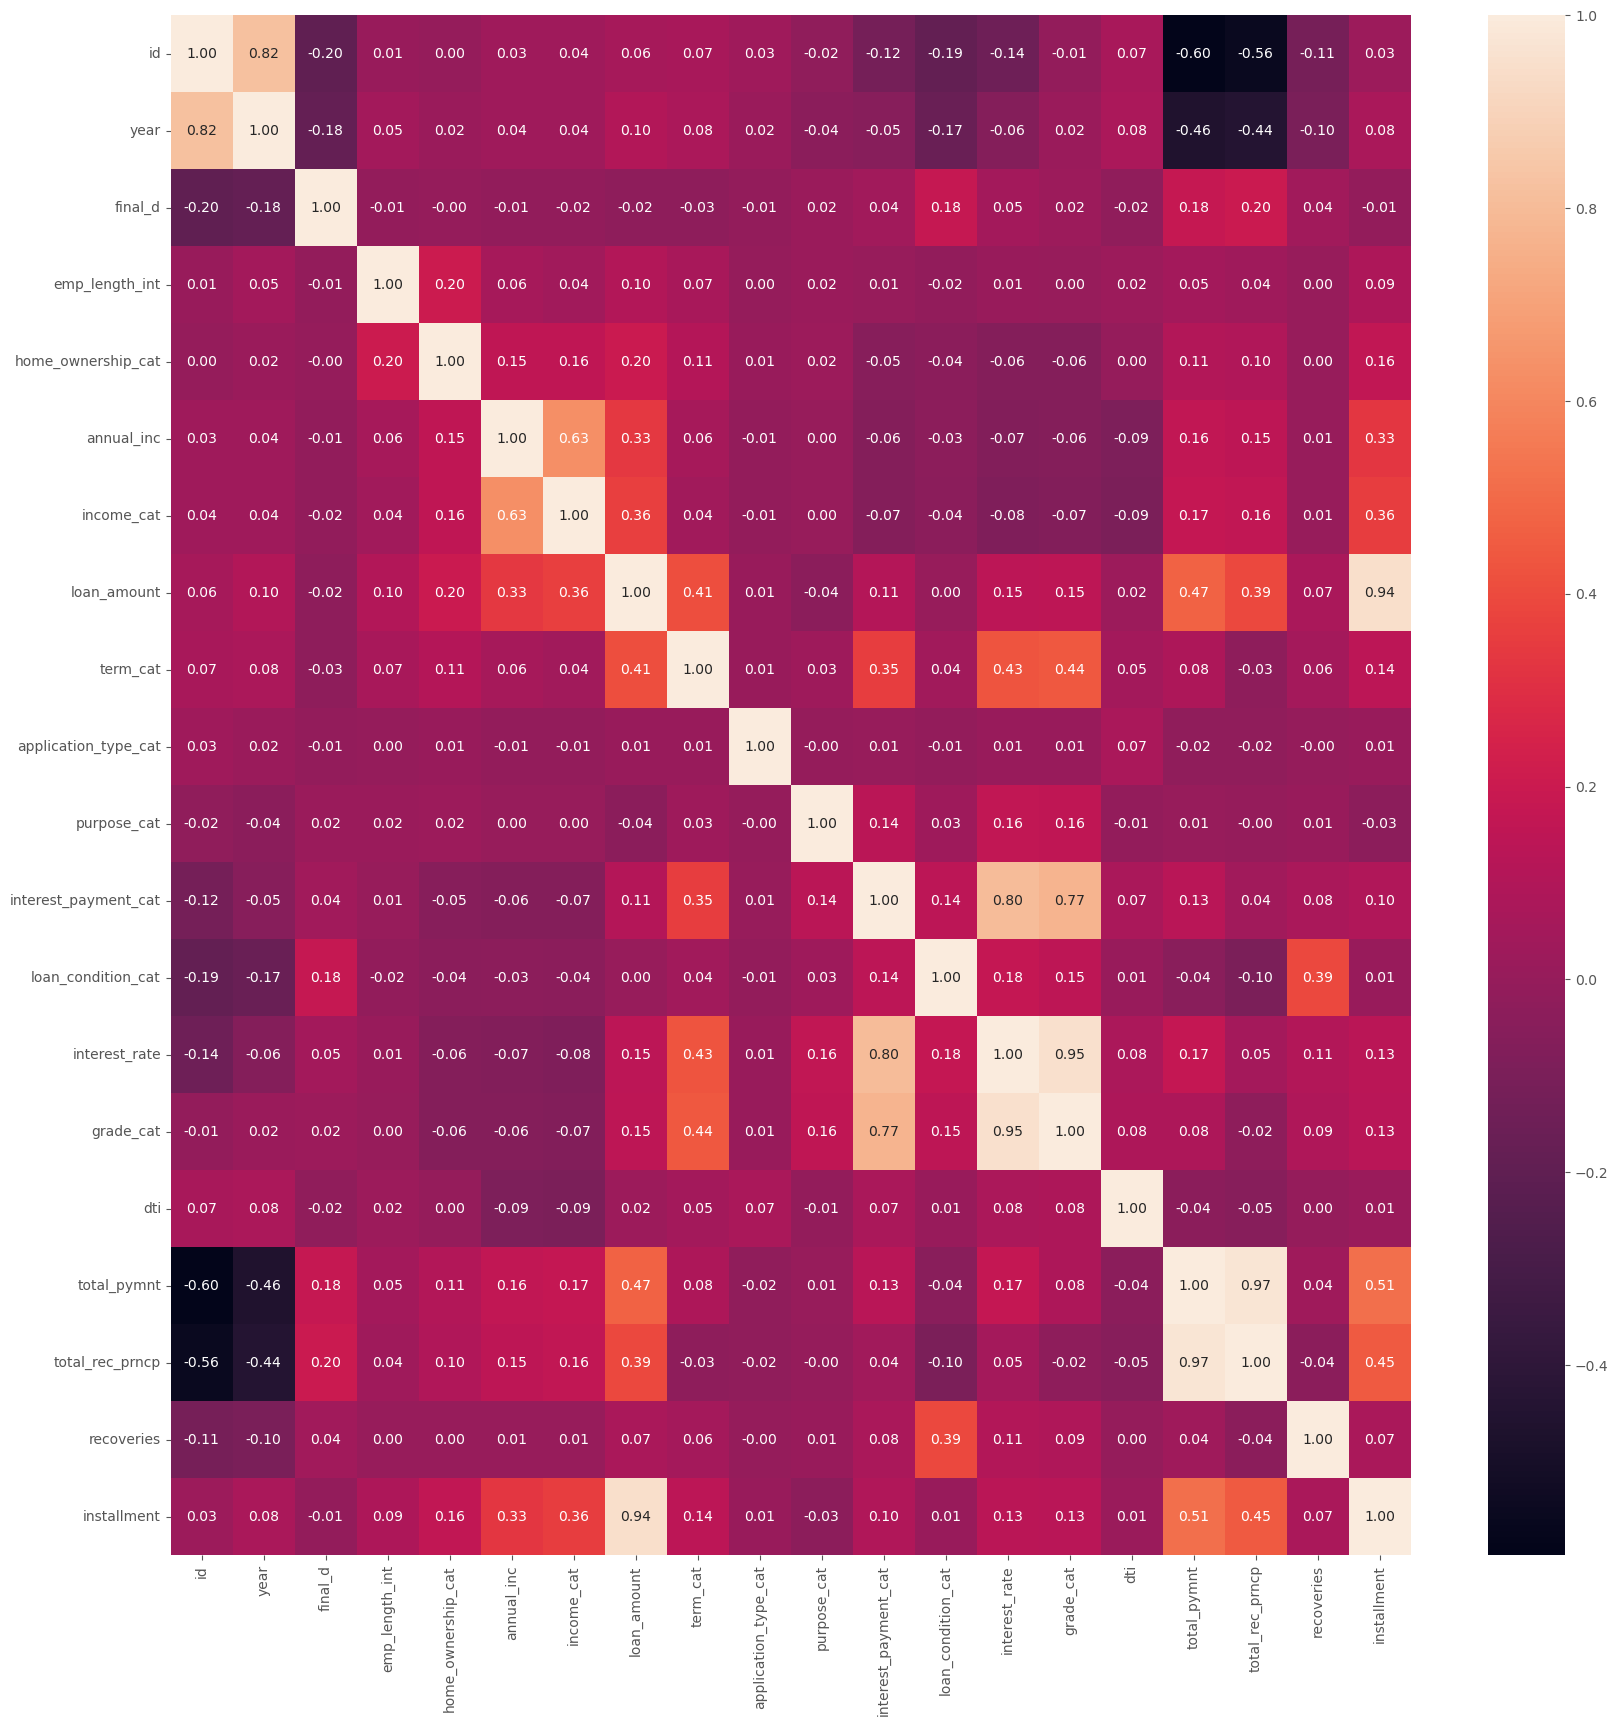

In [40]:
# This code was used to show heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

The heatmap was used to see correleation between dependent variable and independent variable, the brighter the color the higher the correlation. 

Index(['issue_d', 'home_ownership', 'income_category', 'term',
       'application_type', 'purpose', 'interest_payments', 'loan_condition',
       'grade', 'region'],
      dtype='object')


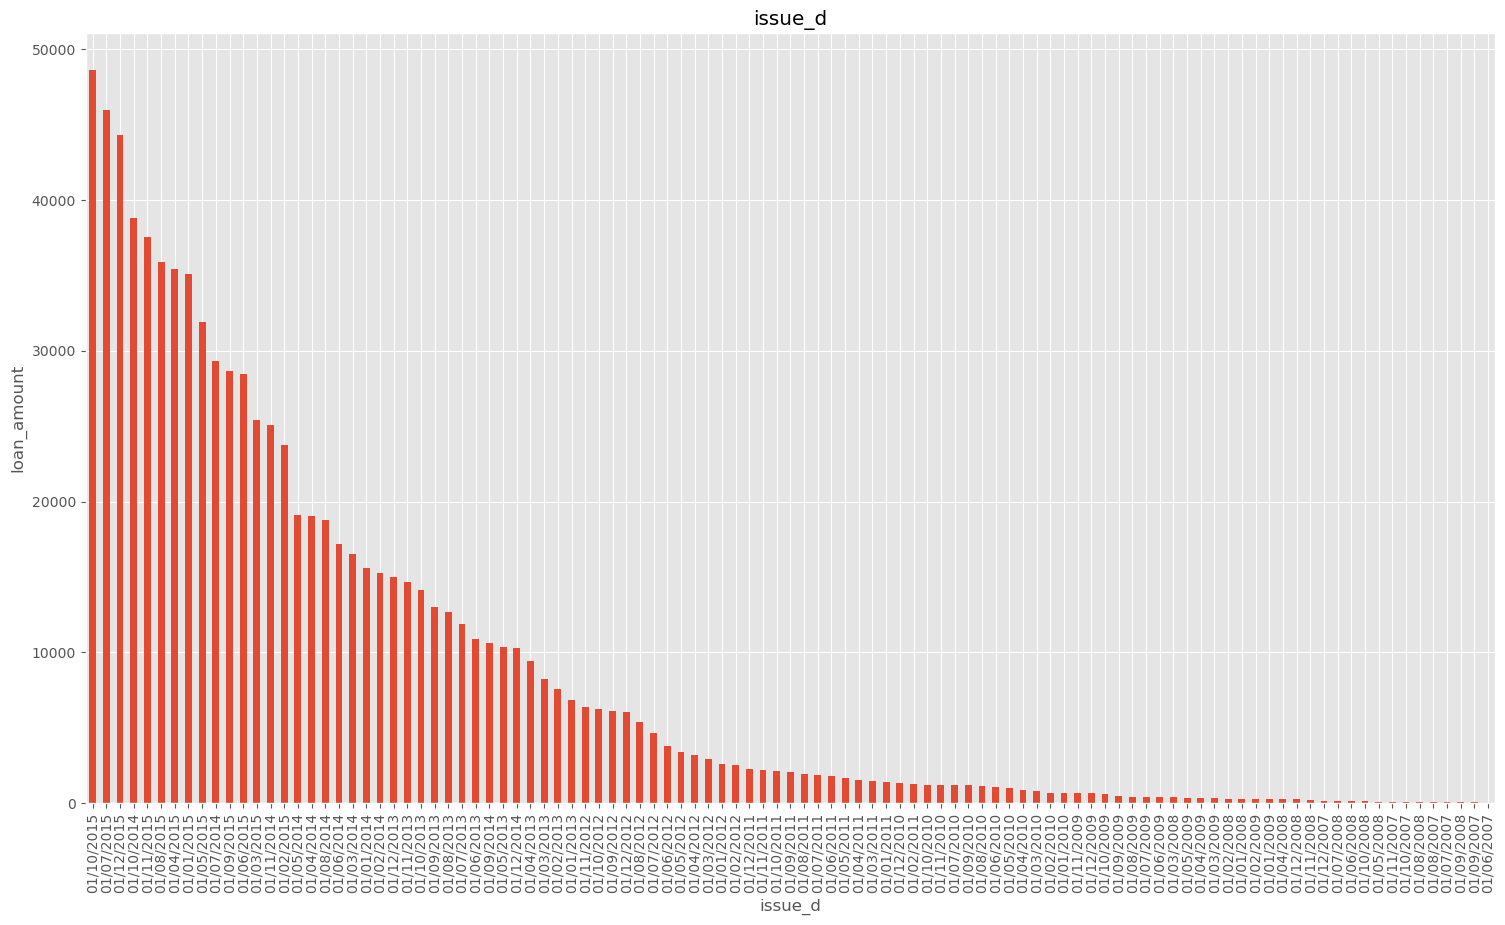

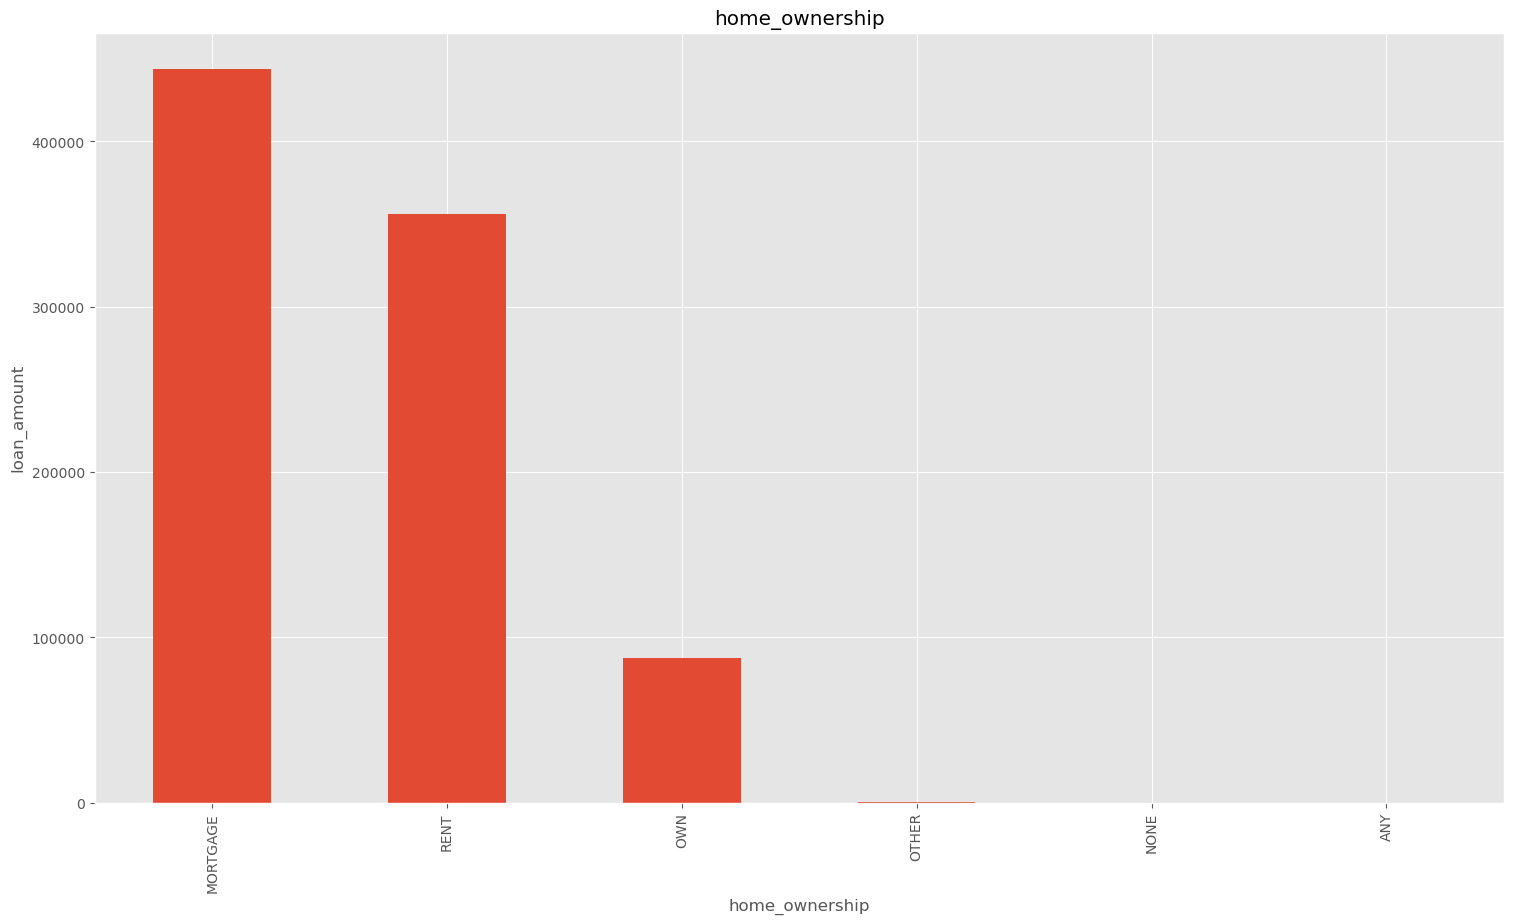

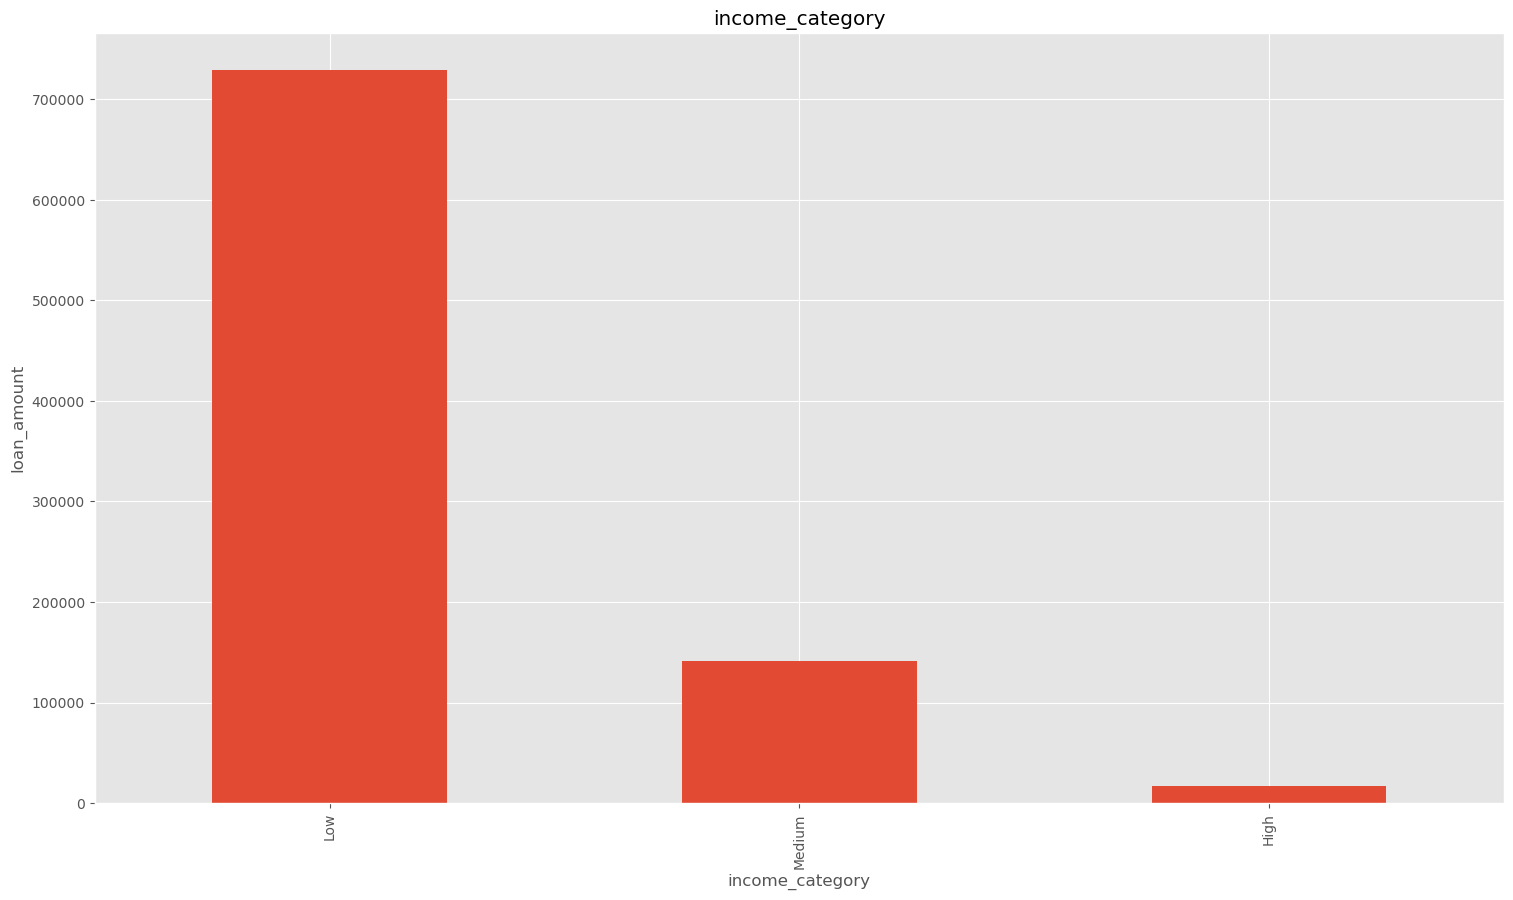

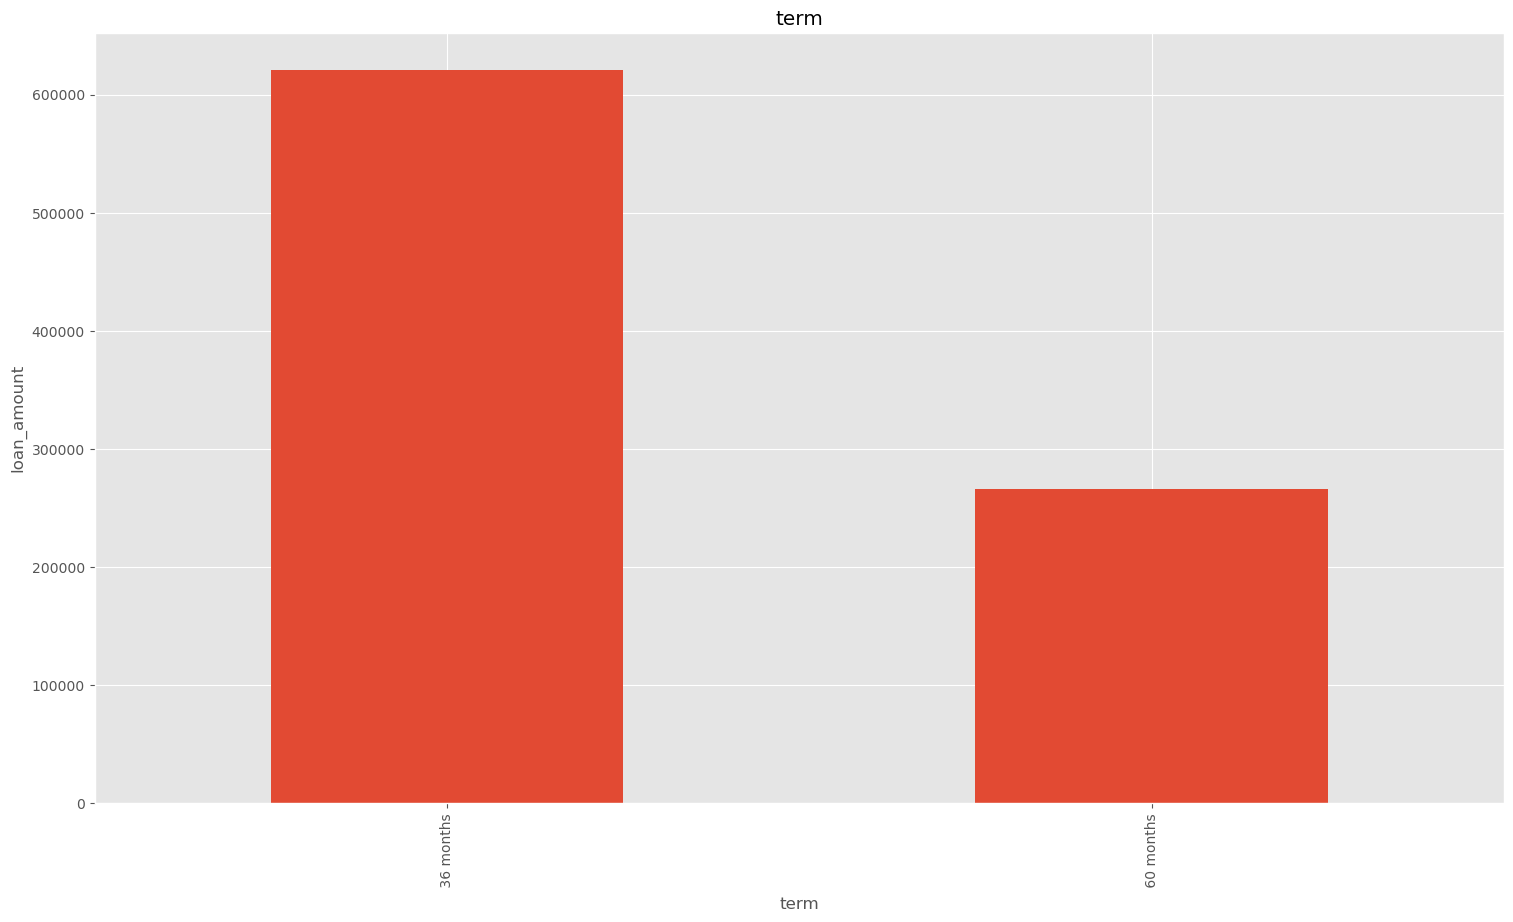

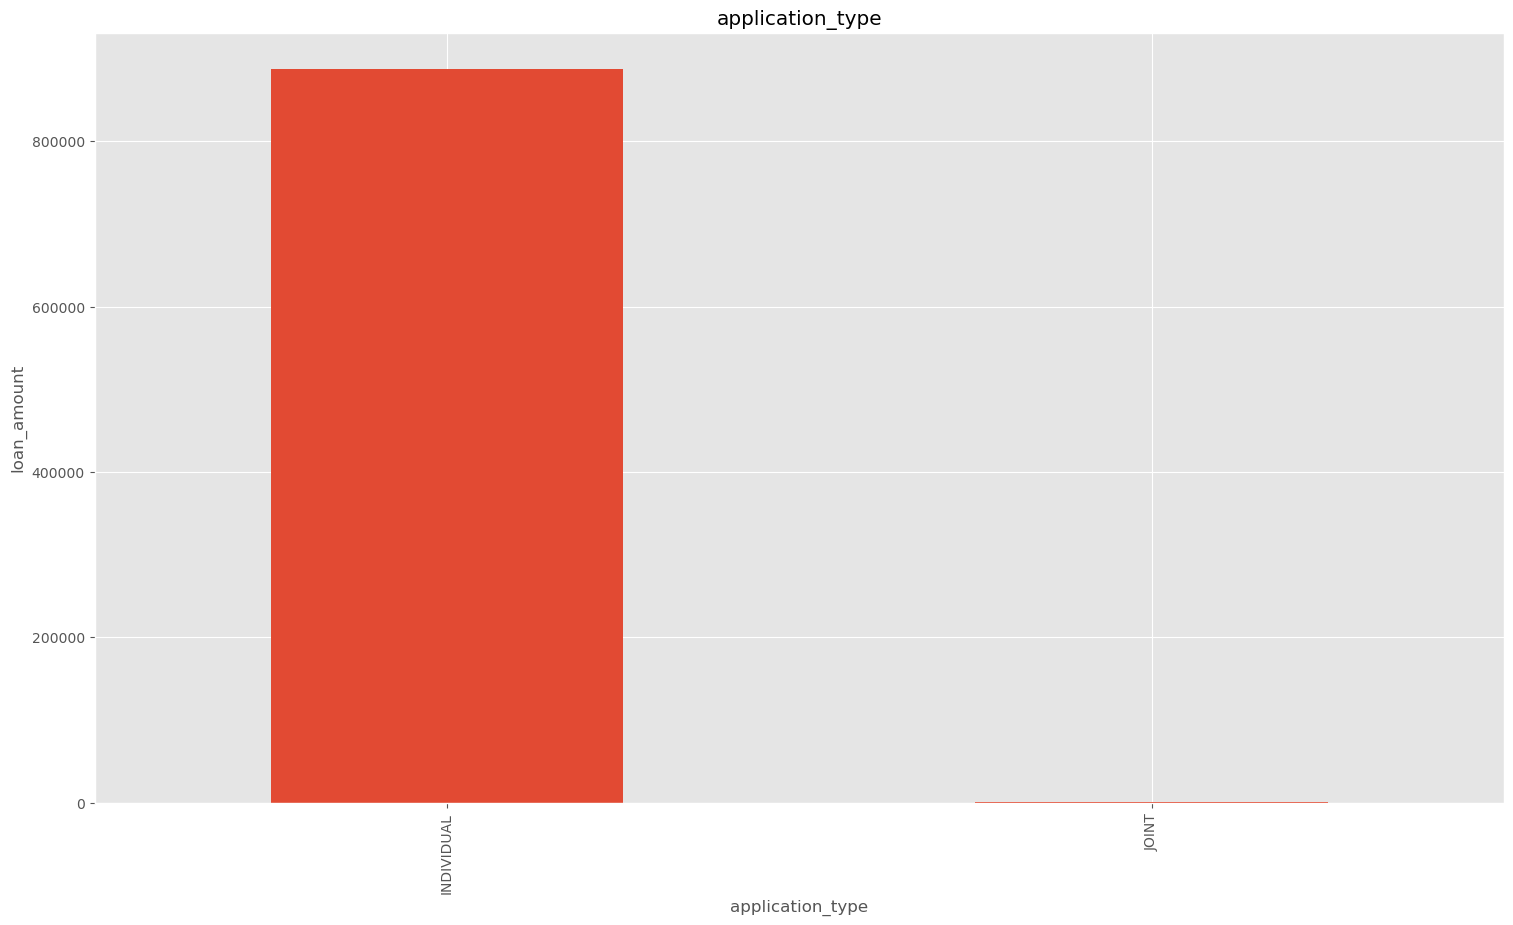

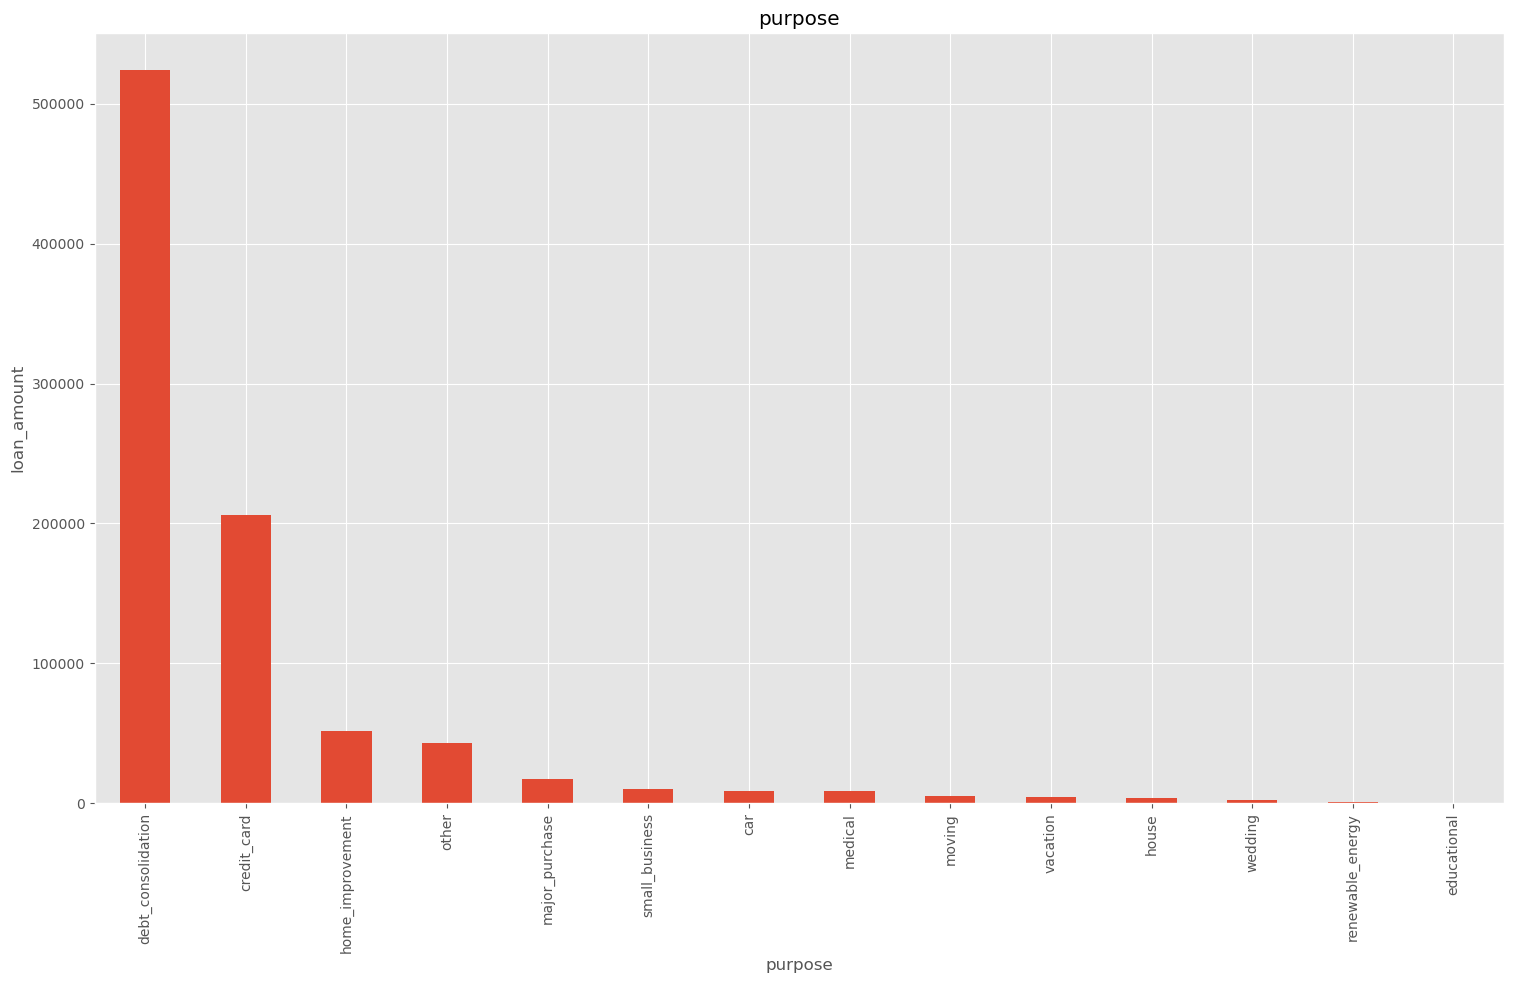

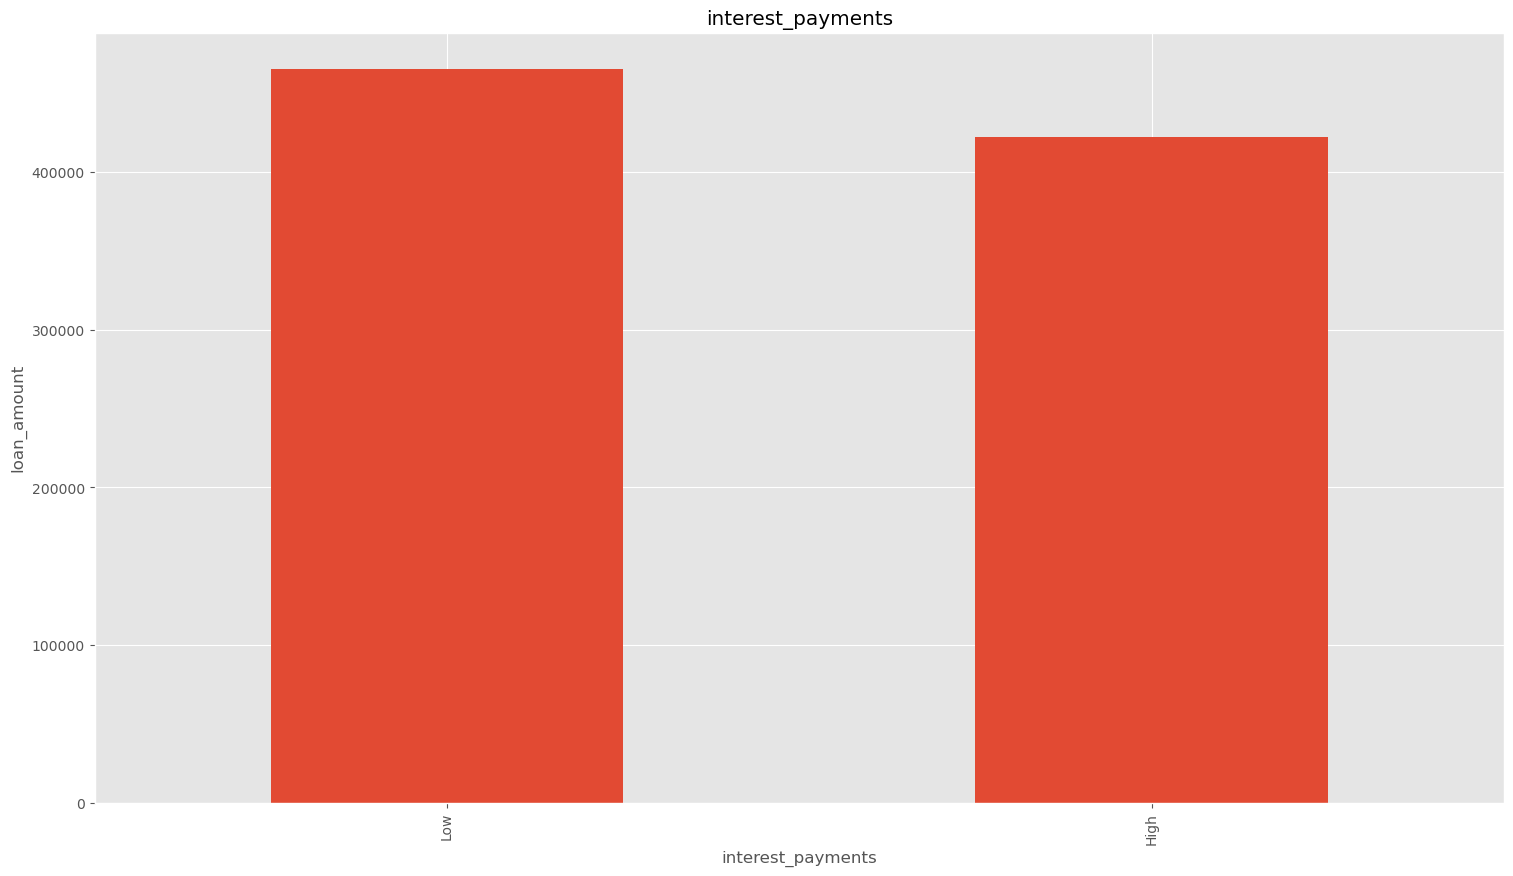

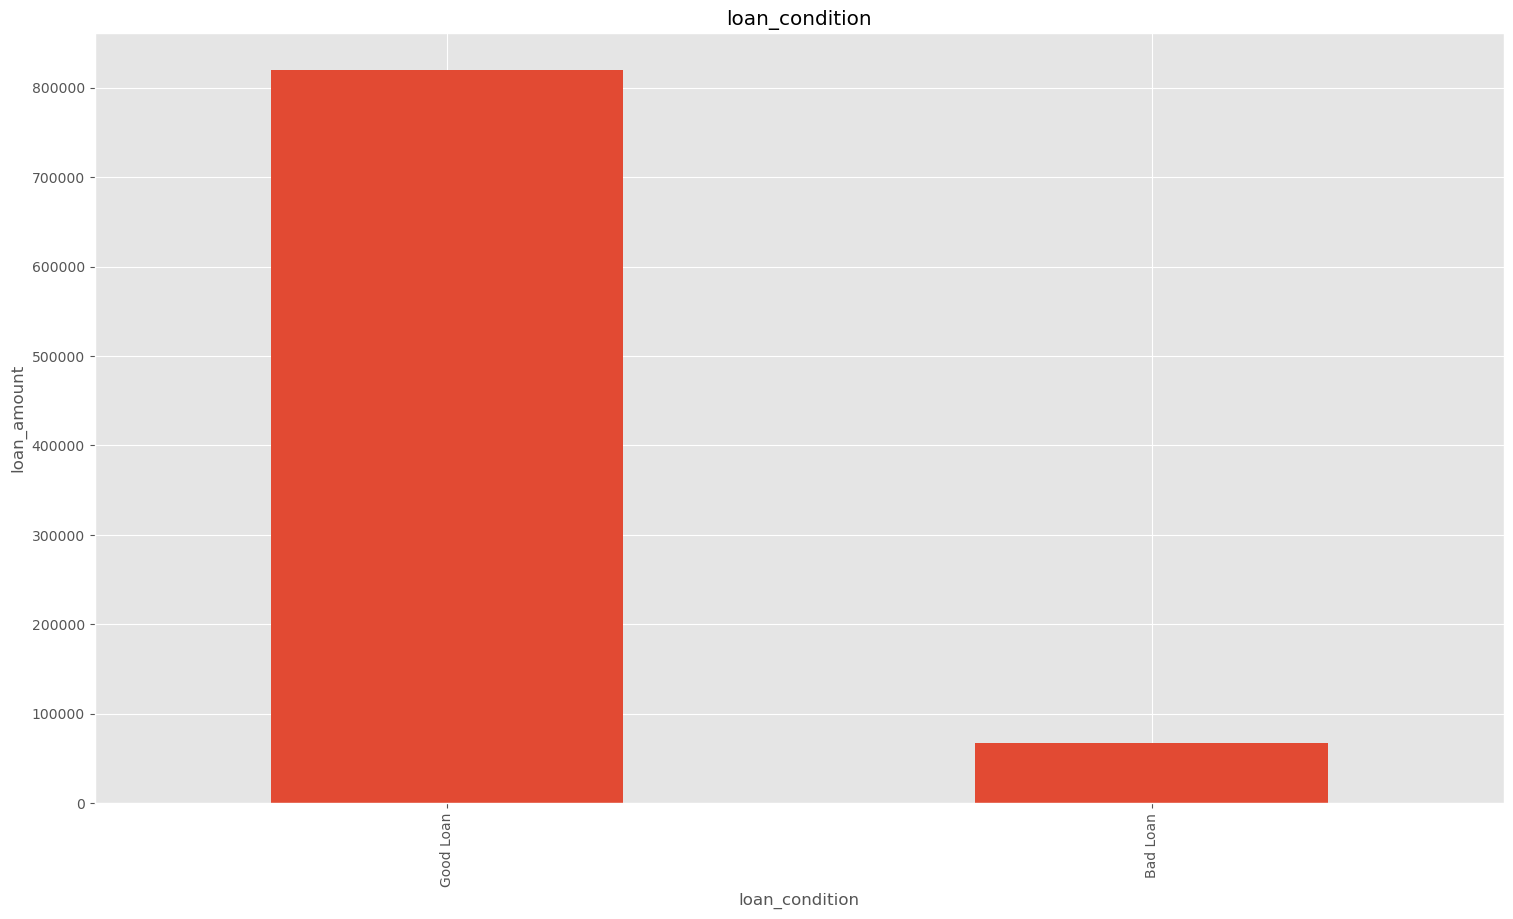

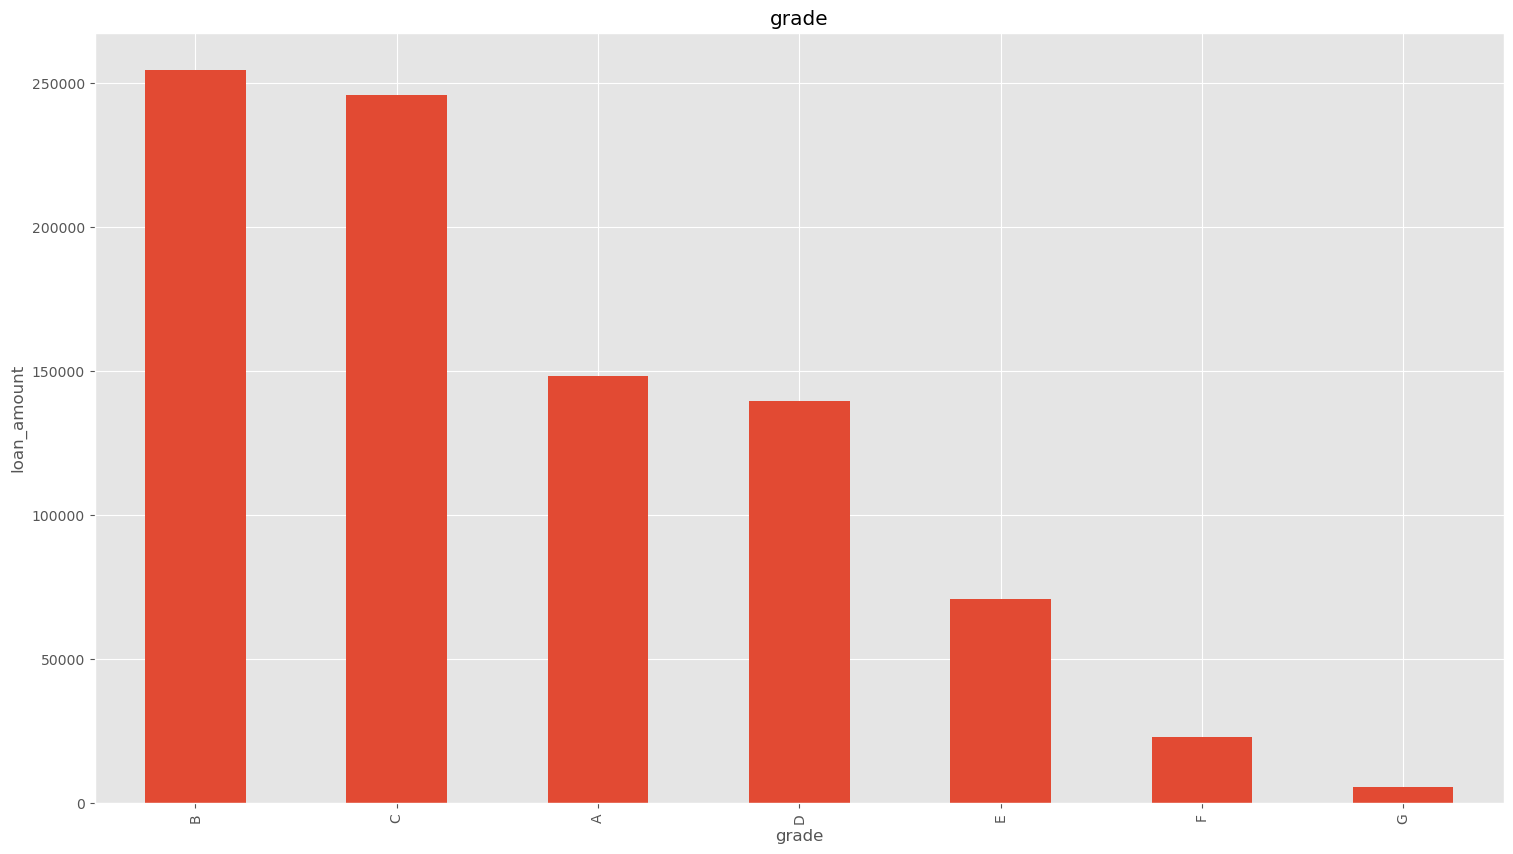

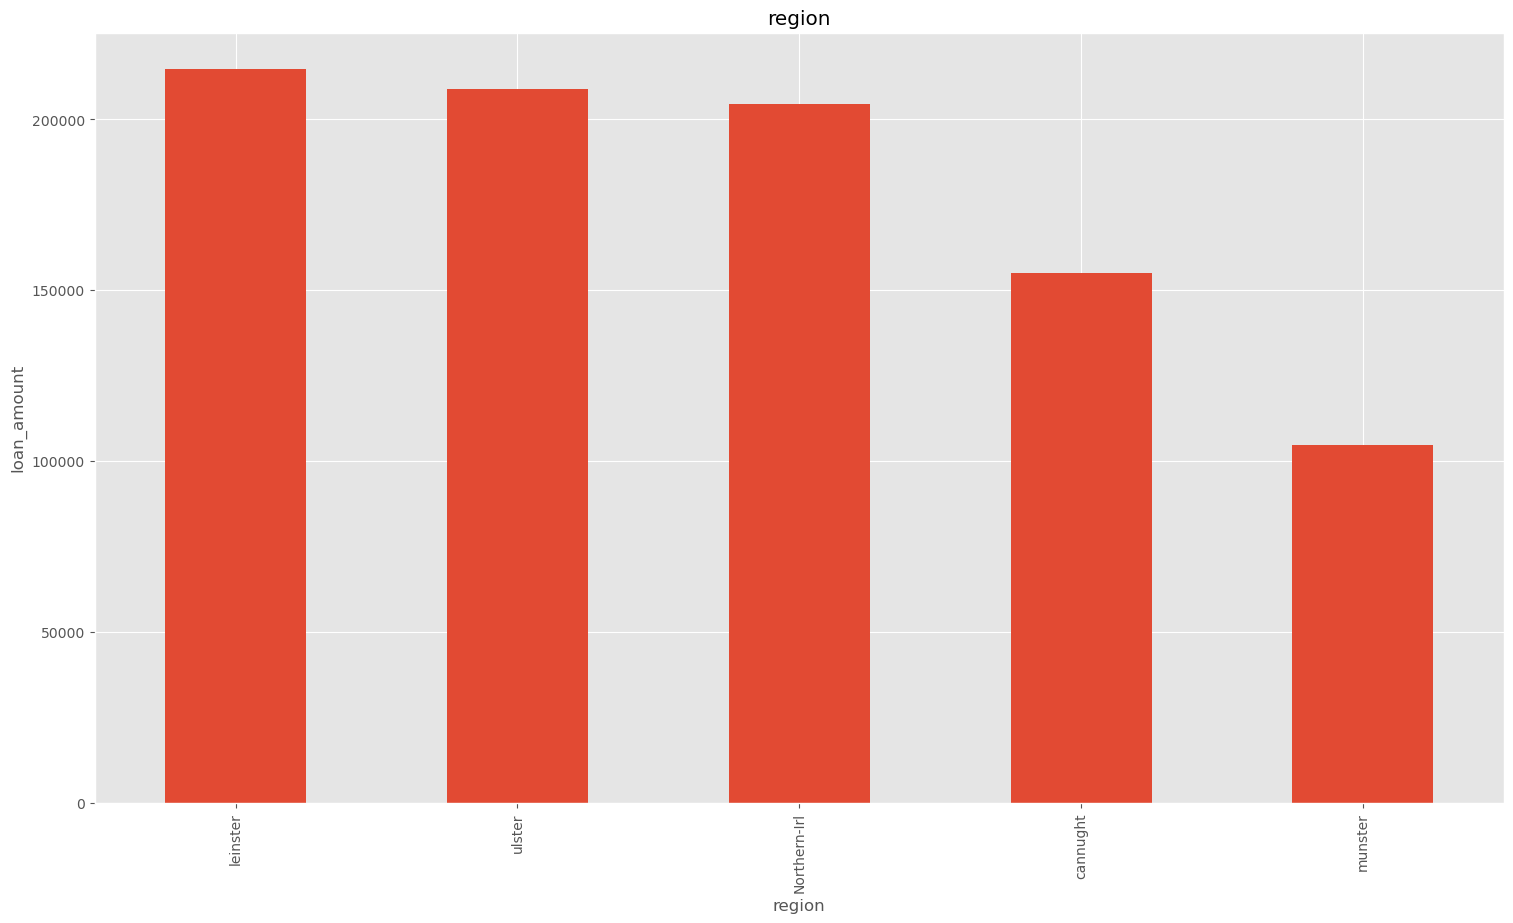

In [41]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(40,10))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("loan_amount")
    plt.title(column)

- First graph above was explaining that loan amount was increasing from each year
- In the second graph was telling that loan amount mostly used for mortgage, rent, and own
- The third grap was showed that those who have highest loan amount are the borrower who have low income and the gap between low, medium and high income in term of the behaviour they borrow money was high.
- Fourth graph was telling that most borrower who borrow more than 600.000 were in 36 months term of payment
- In the fifth graph was explaining that more than 800.0000 loan amount mostly proposed by individual
- Sixth graph was telling that the top three loan amount were purposely borrowed for debt consolidation, credit card, and home improvement.
- The seventh graph was showed that most loan amount were proposed in low interest rate.
- In the eighth graph was showed that most loan amounts above 800.000 were classified in good loan
- The ninth graph was telling that the top three amount in term of grades were consisting of grade B loan, grade C loan and grade A loan respectively.
- The tenth graph was showing loan amount among the regions and it showed that the top three amount were located in leinster, ulster, and northern-irl.

In [42]:
data['year'].unique()

array([2011, 2010, 2009, 2008, 2007, 2013, 2012, 2014, 2015])

In [43]:
# This code was used to show independent variable proportion

print("proporsi kategori 1 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 1])/len(data))
print("proporsi kategori 0 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 2])/len(data))
print("proporsi kategori 0 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 3])/len(data))
print("proporsi kategori 0 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 4])/len(data))
print("proporsi kategori 0 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 6])/len(data))
print("proporsi kategori 0 ('Credit Grade') pada target: ", len(data[data['grade_cat'] == 7])/len(data))

proporsi kategori 1 ('Credit Grade') pada target:  0.16701093895618446
proporsi kategori 0 ('Credit Grade') pada target:  0.2868391070782608
proporsi kategori 0 ('Credit Grade') pada target:  0.27706312635300134
proporsi kategori 0 ('Credit Grade') pada target:  0.15725186194399463
proporsi kategori 0 ('Credit Grade') pada target:  0.025970864760153214
proporsi kategori 0 ('Credit Grade') pada target:  0.00618563206927367


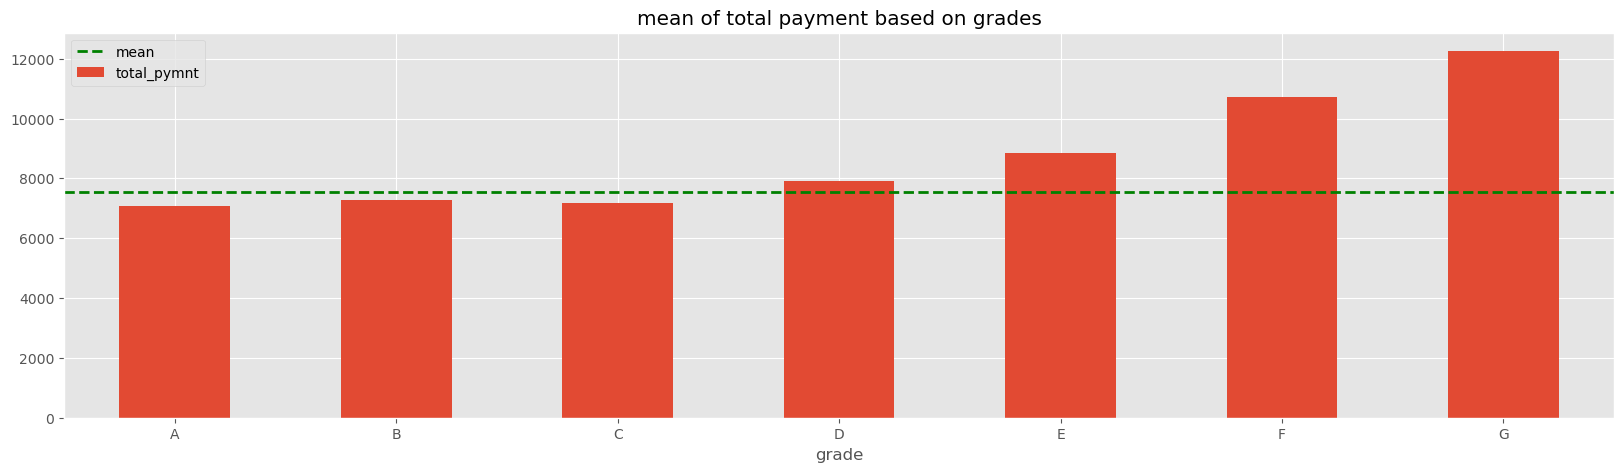

In [44]:
# This code was used to show data distribution from each from the unique in grade column

data.groupby('grade')['total_pymnt'].mean().plot(kind='bar', figsize= (20, 5))
plt.axhline(data['total_pymnt'].mean(), color= 'green', linewidth=2, linestyle='dashed', label='mean')
plt.xticks(rotation=0)
plt.title('mean of total payment based on grades')
plt.legend()
plt.show()

The graph above was telling that the top three total payments were done by loan in grade G,F and E respectively.

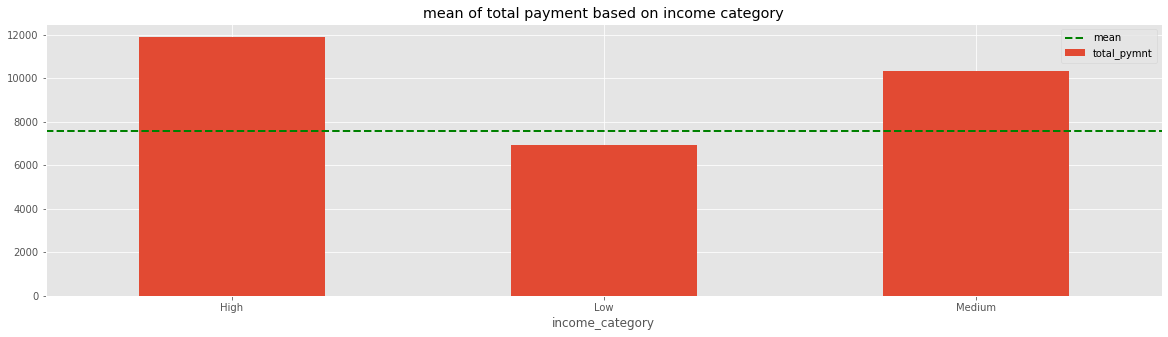

In [35]:
# This code was used to show data distribution from each from the unique in grade column

data.groupby('income_category')['total_pymnt'].mean().plot(kind='bar', figsize= (20, 5))
plt.axhline(data['total_pymnt'].mean(), color= 'green', linewidth=2, linestyle='dashed', label='mean')
plt.xticks(rotation=0)
plt.title('mean of total payment based on income category')
plt.legend()
plt.show()

In [36]:

# Figuring out the amount of total payment based on interest rate

data.groupby('grade')[['total_pymnt','interest_rate']].mean().sort_values(by='interest_rate', ascending=False)

,total_pymnt,interest_rate
grade,,
G,12254.420001,25.626706
F,10718.213782,23.582787
E,8862.453019,19.897322
D,7922.393262,17.175814
C,7175.405419,13.980098
B,7266.042944,10.829618
A,7068.284092,7.243312


In [37]:

# Figuring out the amount of total payment based on interest rate

data.groupby('grade')[['total_pymnt','interest_rate']].mean().sort_values(by='total_pymnt', ascending=False)

,total_pymnt,interest_rate
grade,,
G,12254.420001,25.626706
F,10718.213782,23.582787
E,8862.453019,19.897322
D,7922.393262,17.175814
B,7266.042944,10.829618
C,7175.405419,13.980098
A,7068.284092,7.243312


From the table above we can clearly see that grade G loan was at the top when it was ordered by the highest interest rate and it was also the second highest total payment.

In [38]:

# Figuring out the amount of total payment based on interest rate

data.groupby('year')[['total_pymnt','interest_rate']].mean().sort_values(by='total_pymnt', ascending=False)

,total_pymnt,interest_rate
year,,
2012,14482.222235,13.637676
2013,13916.068417,14.531745
2011,13057.790259,12.223746
2010,11228.122206,11.985268
2009,10589.469780,12.437247
2014,9454.483774,13.771245
2008,8497.710237,12.061964
2007,7830.807385,11.825108
2015,3149.641624,12.601731


In [39]:
# Figuring out the amount of total payment based on interest rate

data.groupby('grade')[['year','interest_rate']].mean().sort_values(by='year', ascending=True)

,year,interest_rate
grade,,
G,2013.745673,25.626706
F,2013.905927,23.582787
B,2013.962976,10.829618
A,2013.978455,7.243312
D,2014.030313,17.175814
E,2014.092016,19.897322
C,2014.100687,13.980098


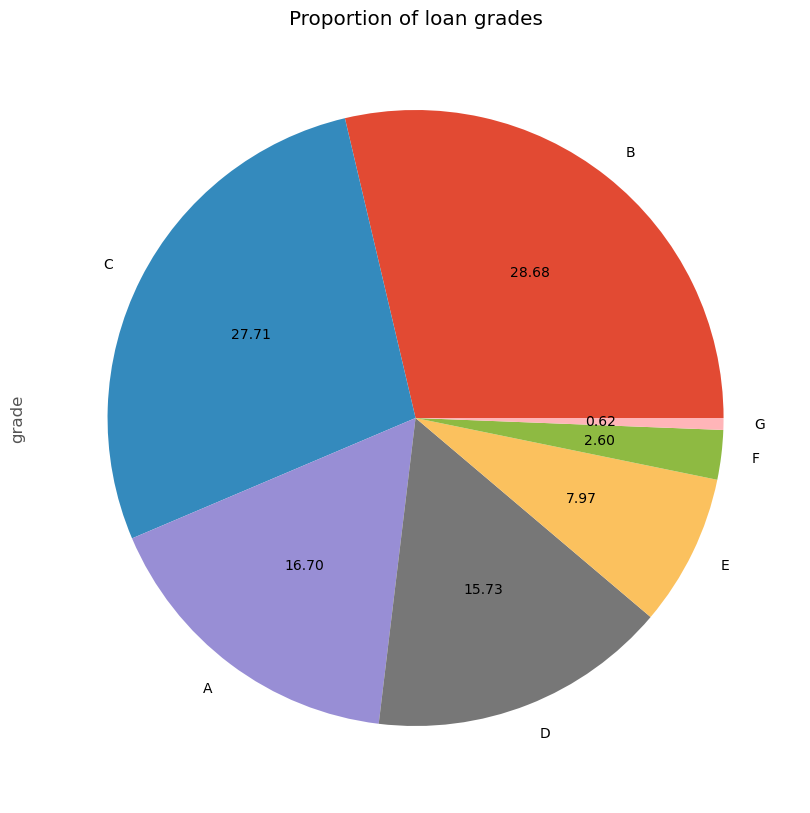

In [45]:
# This code was run to show pie chart that illustrate proportion of loan grade in dataset

data['grade'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')
plt.title('Proportion of loan grades')
plt.show()

From the pie chart above it could be seen that the highest proportion was filled by grade B at 28.86 percent, grade C at 27.71 percent and grade A at 16.70 percent. Otherwise the three smallest proportions were consisted of grade E, F, G at 7.97, 2.6, 0.62 respectively.

In [41]:
# Feature selection and made a copy from dataset to avoid re loading the data from the original one
df_copy = data[['final_d', 'emp_length_int',
       'home_ownership_cat', 'annual_inc', 'income_cat',
       'loan_amount', 'term_cat',
       'application_type_cat','purpose_cat', 'interest_payment_cat', 
       'loan_condition_cat',
       'interest_rate','grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment']]
df_copy.head(5)

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1012015,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87
1,1042013,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83
2,1062014,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33
3,1012015,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31
4,1012016,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79


In [42]:
# Creating ten sample for model inference

data_inf = df_copy.sample(10, random_state=10)
data_inf

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
554010,1012016,0.5,2,200000,2,25000,1,1,7,2,0,13.33,3,13.99,1674.150000,1143.56,0.0,846.33
604496,1122015,2.0,1,129000,2,30000,2,1,6,2,0,18.55,5,26.19,2281.510000,935.49,0.0,770.81
194542,1112015,10.0,1,38500,1,7000,1,1,6,2,0,16.29,3,34.50,8966.280006,7000.00,0.0,247.11
360951,1012016,10.0,3,35000,1,2400,1,1,4,2,0,14.49,3,28.53,1486.800000,1070.90,0.0,82.60
13595,1062014,2.0,1,88000,1,15000,2,1,4,2,0,20.99,6,9.63,22469.800970,15000.00,0.0,405.72
270346,1122015,1.0,2,55421,1,23225,1,1,6,2,0,13.98,3,20.84,11091.660000,7902.82,0.0,793.55
507007,1012016,10.0,3,73000,1,15000,1,1,1,1,0,5.32,1,24.56,447.300000,385.23,0.0,451.73
246884,1012016,10.0,3,140000,2,12000,1,1,1,1,0,12.99,3,20.42,5651.120000,4123.51,0.0,404.27
259942,1012016,10.0,3,55000,1,6400,1,1,6,1,0,8.67,2,10.06,2832.480000,2293.99,0.0,202.54
829564,1122015,0.5,3,54000,1,1175,1,1,8,2,0,13.33,3,21.16,396.930000,281.04,0.0,39.78


In [43]:
# dropping rows for model inference from the dataset

data_train_test = df_copy.drop(data_inf.index)
data_train_test

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1012015,10.0,1,24000,1,5000,1,1,1,1,0,10.65,2,27.65,5861.071414,5000.00,0.00,162.87
1,1042013,0.5,1,30000,1,2500,2,1,2,2,1,15.27,3,1.00,1008.710000,456.46,117.08,59.83
2,1062014,10.0,1,12252,1,2400,1,1,3,2,0,15.96,3,8.72,3003.653644,2400.00,0.00,84.33
3,1012015,10.0,1,49200,1,10000,1,1,4,2,0,13.49,3,20.00,12226.302210,10000.00,0.00,339.31
4,1012016,1.0,1,80000,1,3000,2,1,4,1,0,12.69,2,17.94,3242.170000,2233.10,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,1012016,8.0,1,31000,1,10000,1,1,6,1,0,11.99,2,28.69,3971.880000,2944.53,0.00,332.10
887375,1012016,10.0,3,79000,1,24000,1,1,7,1,0,11.99,2,3.90,9532.390000,7066.74,0.00,797.03
887376,1012016,5.0,1,35000,1,13000,2,1,6,2,0,15.99,4,30.90,3769.740000,1844.50,0.00,316.07
887377,1012016,1.0,1,64400,1,12000,2,1,6,2,0,19.99,5,27.19,3787.670000,1552.69,0.00,317.86


In [46]:
# Reset the index of dataset to minimize the possibility of error

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [47]:
# Splitting dependet variable and independent variable

y = data_train_test['grade_cat']
X = data_train_test.drop(columns='grade_cat', axis=1)

In [48]:
# train test split (test proportion 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print('X_Train shape: ', X_train.shape)
print('X_Test shape: ', X_test.shape)
print('y_Train shape: ', y_train.shape)
print('y_Test shape: ', y_test.shape)

X_Train shape:  (709895, 17)
X_Test shape:  (177474, 17)
y_Train shape:  (709895,)
y_Test shape:  (177474,)


In [49]:
# show up column with the true numeric value

print(num_columns)
print('Jumlah numerical columns: ', len(num_columns))

['emp_length_int', 'home_ownership_cat', 'annual_inc', 'income_cat', 'loan_amount', 'term_cat', 'application_type_cat', 'purpose_cat', 'interest_payment_cat', 'loan_condition_cat', 'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']
Jumlah numerical columns:  16


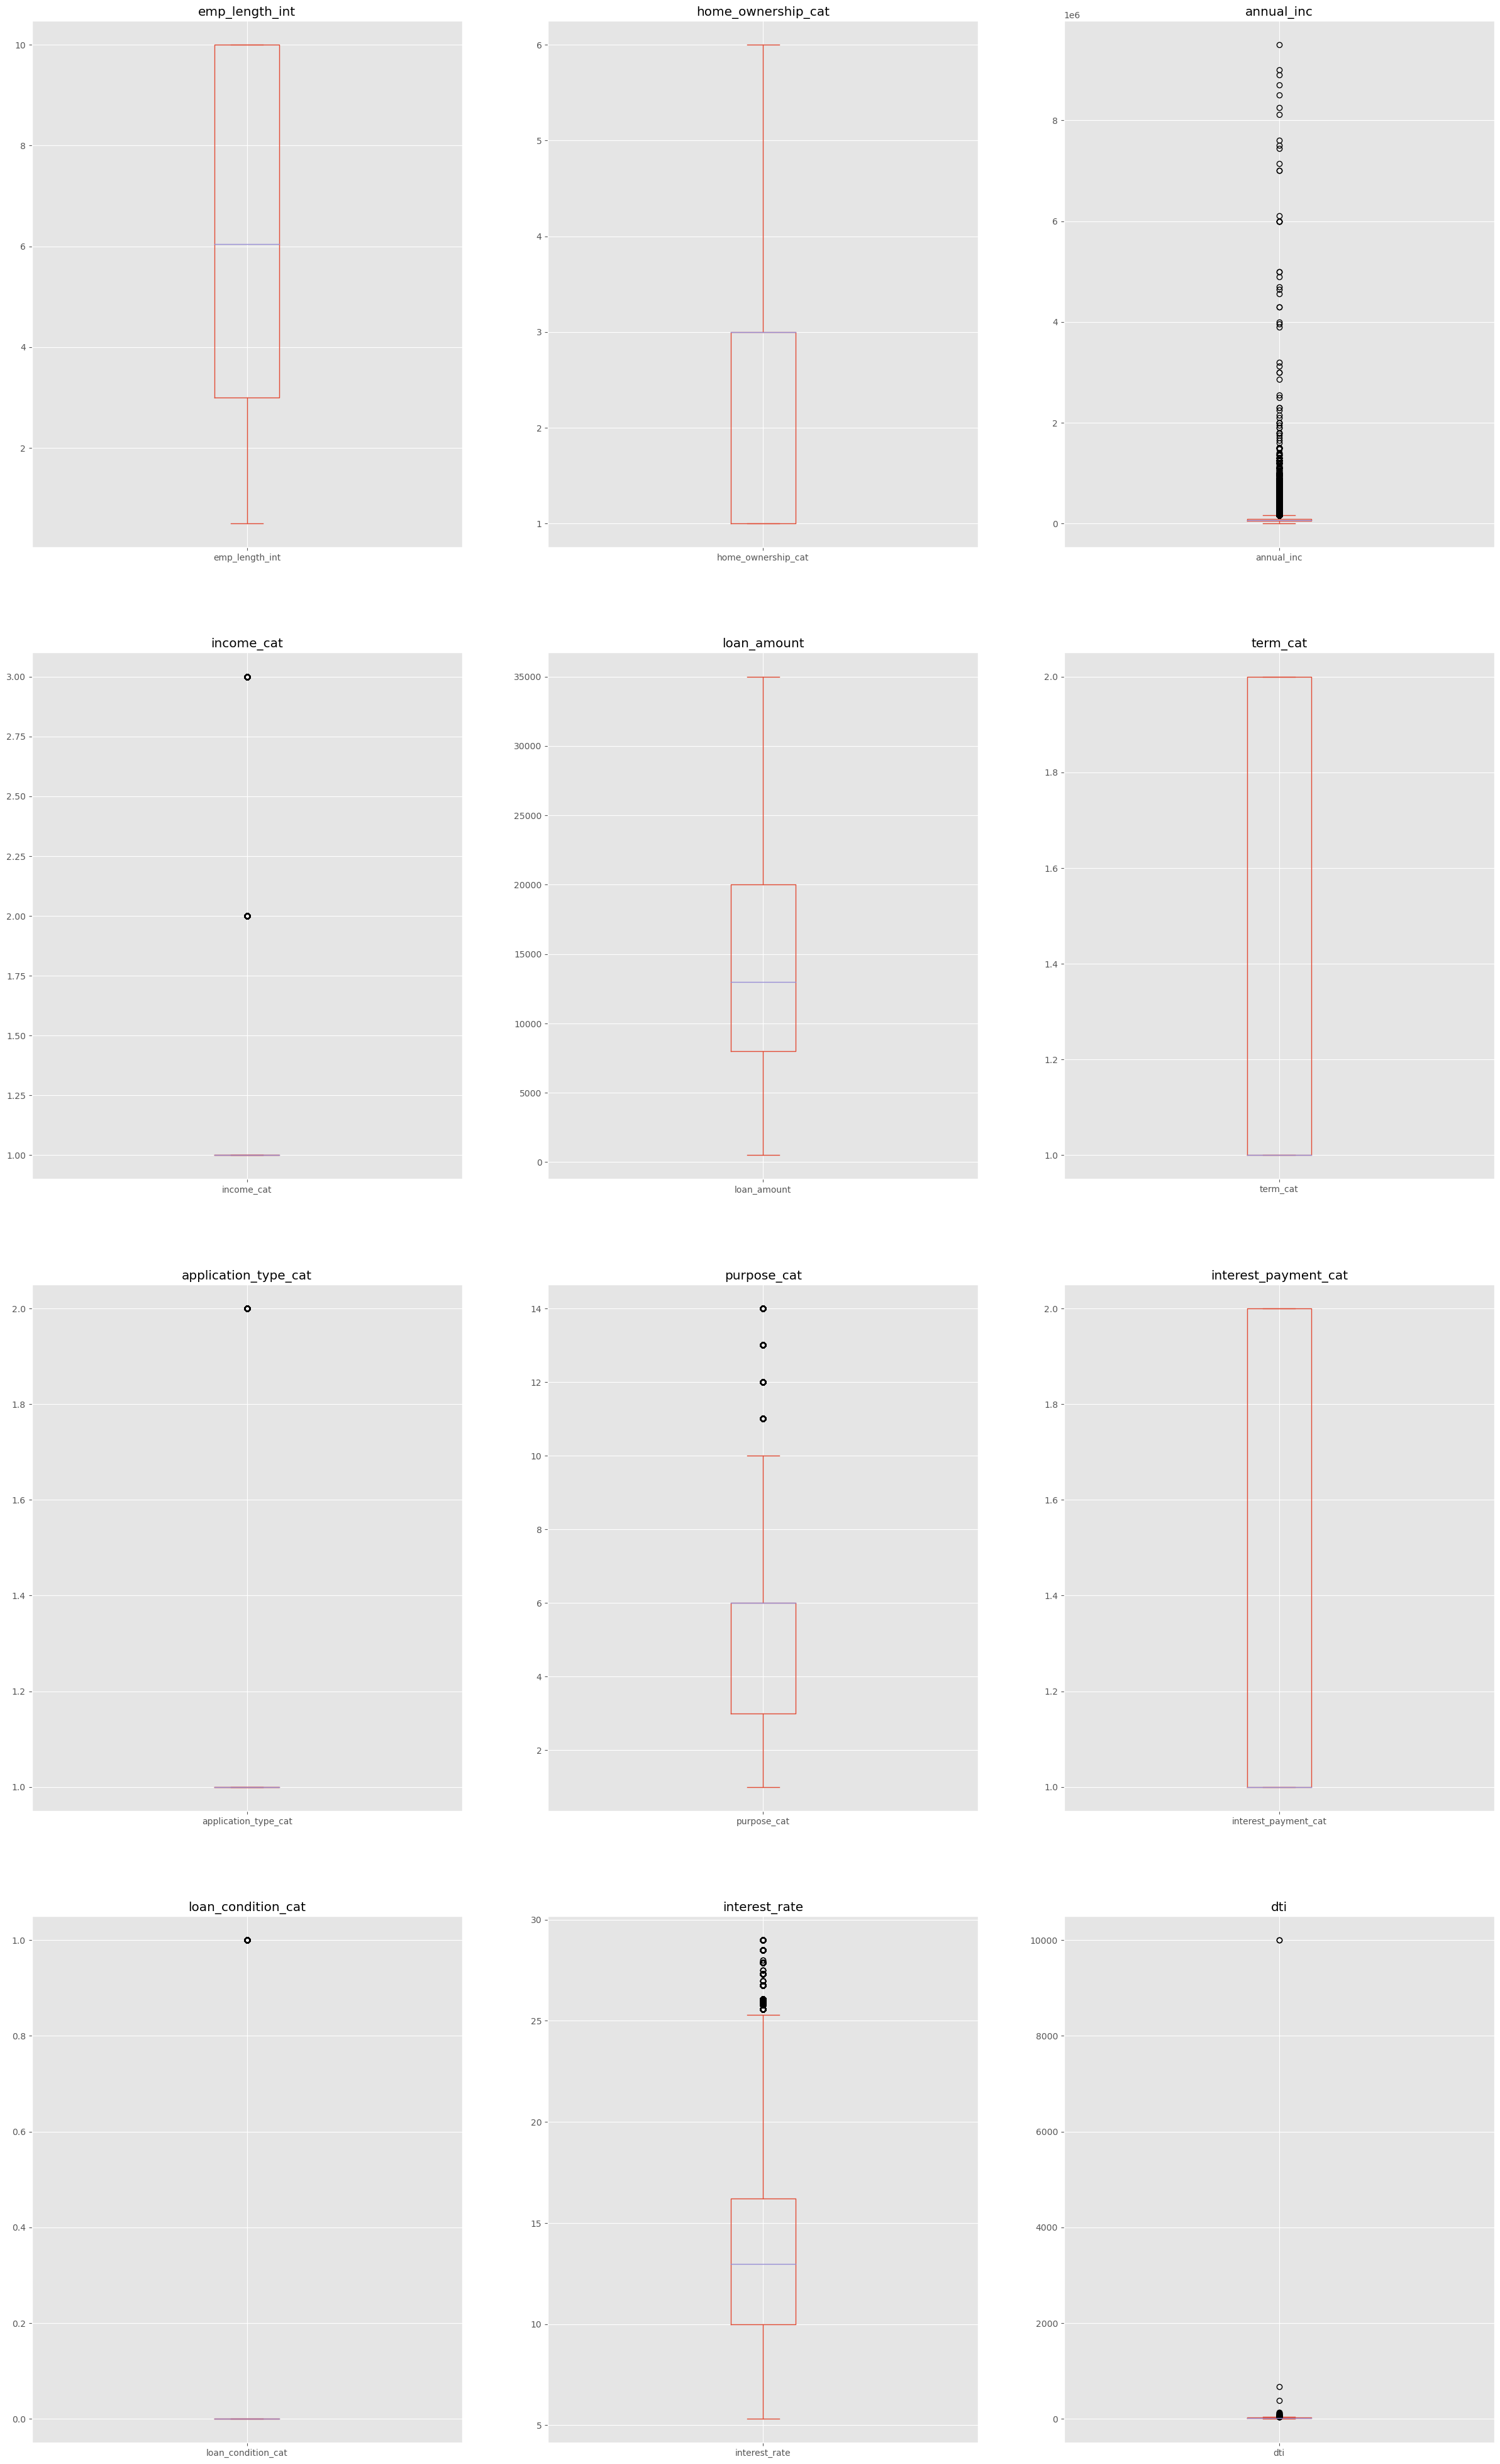

In [50]:
# Figuring out the outlier by analyzing the boxplot

k = 0

figs, axs = plt.subplots(nrows=4, ncols=3,figsize=(30,50))

for i in range(4):
    for j in range(3):
        X_train[num_columns[k]].plot(kind='box', title= num_columns[k], ax=axs[i,j]) #num_columns telah di definisikan pada proses data loading diatas
        k += 1

plt.show()

From the barplot above it could be seen that outliers were detected in features annual_inc, income_cat, application_type_cat, loan_condition_cat, and dti. In this research we were not handling outliers by dropping it because the financial data might contain outlier by nature.

In [51]:
# Defining the function to identify skewness

def find_skewness(df, numeric_columns):
    for column in numeric_columns:
        print(f'Skewness {column}: ', df[column].skew())

# Defining function to set boundaries in feature columns which normally distribute or skewed

def find_normal_boundaries(df, column):
    upper_bound = df[column].mean() + 3 * df[column].std()
    lower_bound = df[column].mean() - 3 * df[column].std()
    return upper_bound, lower_bound

def find_skewed_boundaries(df, column, distance):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - (IQR * distance)
    upper_bound = df[column].quantile(0.75) + (IQR * distance)
    return upper_bound, lower_bound

# Defining function to find the percentage of outlier based on its distribution

def find_outliers_percentage(df, numeric_columns):
    for column in numeric_columns:
        if df[column].skew() <= 0.5 and df[column].skew() >= -0.5:
            upper_bound, lower_bound = find_normal_boundaries(df, column)
        elif df[column].skew() > 1 or df[column].skew() < -1:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=3) #distance untuk extremely skewed
        else:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=1.5) #distance untuk moderate skewed
        print(f"outliers {column}: ", len( df[(df[column] > upper_bound) | (df[column] < lower_bound)] ) *100 / len(df) , '%')


In [52]:
find_outliers_percentage(X_train, ['loan_amount', 'total_pymnt'])

outliers loan_amount:  0.0 %
outliers total_pymnt:  0.977045901154396 %


In [53]:
# Checking the missing value

print('Missing Values X_train:', X_train.isnull().sum().sum())
print('Missing Values X_test:', X_test.isnull().sum().sum())
print('Missing Values y_train:', y_train.isnull().sum())
print('Missing Values y_test:', y_test.isnull().sum())

Missing Values X_train: 0
Missing Values X_test: 0
Missing Values y_train: 0
Missing Values y_test: 0


In [54]:
y_train.isna().sum()

0

In [55]:
# checking missing value in X_train

print('Missing Values X_train:', X_train.isnull().sum())

Missing Values X_train: final_d                 0
emp_length_int          0
home_ownership_cat      0
annual_inc              0
income_cat              0
loan_amount             0
term_cat                0
application_type_cat    0
purpose_cat             0
interest_payment_cat    0
loan_condition_cat      0
interest_rate           0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
dtype: int64


In [56]:
# Checking missing value in X_test

print('Missing Values X_test:', X_test.isnull().sum())

Missing Values X_test: final_d                 0
emp_length_int          0
home_ownership_cat      0
annual_inc              0
income_cat              0
loan_amount             0
term_cat                0
application_type_cat    0
purpose_cat             0
interest_payment_cat    0
loan_condition_cat      0
interest_rate           0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
dtype: int64


In [57]:
# Checking skewness in X_train to define of which strategy to fill the missing value eaither with median or mean

find_skewness(X_train, num_columns)

Skewness emp_length_int:  -0.20757461886041847
Skewness home_ownership_cat:  -0.1958853776998819
Skewness annual_inc:  46.345233690903676
Skewness income_cat:  2.1573387401064177
Skewness loan_amount:  0.680381605673824
Skewness term_cat:  0.8725916481642866
Skewness application_type_cat:  42.251114993429034
Skewness purpose_cat:  -0.5130907397285445
Skewness interest_payment_cat:  0.09794882957383662
Skewness loan_condition_cat:  3.19572183807396
Skewness interest_rate:  0.42912859978611745
Skewness dti:  426.95453307194174
Skewness total_pymnt:  1.7885424191322385
Skewness total_rec_prncp:  1.9335643659315889
Skewness recoveries:  18.471490018199
Skewness installment:  0.9356945775100245


In [58]:
# reset index in y_train and y_test to be aligned with X_train_cleaned and X_test_cleaned

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [59]:
# fitting min max scaler in X_train

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_train)

X_train_scaled_temporary = min_max_scaler.transform(X_train)
X_train_scaled_temporary

array([[7.27226449e-05, 6.84210526e-01, 0.00000000e+00, ...,
        1.29120175e-01, 0.00000000e+00, 2.34300142e-01],
       [1.00000000e+00, 1.00000000e+00, 2.00000000e-01, ...,
        4.03265369e-02, 0.00000000e+00, 1.64094028e-01],
       [1.00000000e+00, 5.84210526e-01, 2.00000000e-01, ...,
        8.60639262e-02, 0.00000000e+00, 1.70668420e-01],
       ...,
       [6.36386775e-01, 1.00000000e+00, 4.00000000e-01, ...,
        2.34285513e-01, 0.00000000e+00, 1.63597451e-01],
       [7.27226449e-05, 1.00000000e+00, 4.00000000e-01, ...,
        7.96927888e-02, 0.00000000e+00, 4.94946810e-01],
       [1.00000000e+00, 1.00000000e+00, 4.00000000e-01, ...,
        2.34161799e-01, 0.00000000e+00, 4.87687003e-01]])

In [60]:
# checking the data dimension

X_train_scaled_temporary.shape

(709895, 17)

### Principale Component Analysis (PCA)

The idea of PCA was basically to reduce the number of features from high dimensional dataset. This technique was gonna be beneficial to increase machine learning performance

In [61]:
# Defining the PCA

pca = PCA()
pca.fit(X_train_scaled_temporary)

PCA()

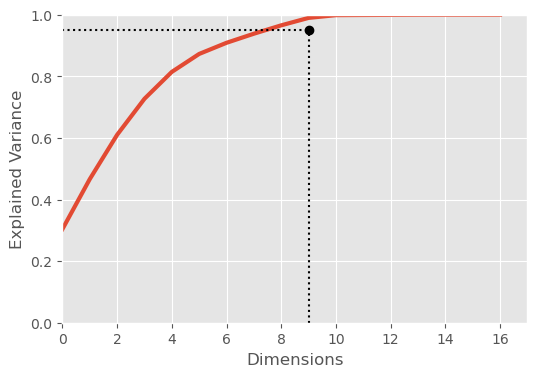

In [62]:
# Finding the n dimenstion which explain 95% variance

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

### Logistic Regression

Logistic regression was an algorithm that was constructed by sigmoid function and and it consisted between value from 0 to 1. 0 The closer to 0 mean the output would be less likely to be labeled as what's in vertical axis and it be labeled for what's in the horizontal axis. The closer the value to one means the output would be more likely to be labeled in the classification that's on vertical axis.

In [63]:
# Defininng machine learning model

model_lr = LogisticRegression()

In [64]:
# Defining the pipeline

pipe_lr = Pipeline([
    ('min_max_scaler_lr', MinMaxScaler()),
    ('PCA_lr', PCA(n_components=10)),
    ('model_lr', LogisticRegression(multi_class= 'multinomial'))
])

# creating list which containes pipeline

pipelines = [pipe_lr]

### Classifiaction Report

In [65]:
# This code were used to see the classification report from logistic regression

pipe_lr.fit(X_train, y_train)

y_train_pred = pipe_lr.predict(X_train)
y_test_pred = pipe_lr.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

/Users/rairamones/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rairamones/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rairamones/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score

              precision    recall  f1-score   support

           1       0.88      0.97      0.92    118410
           2       0.75      0.89      0.82    203918
           3       0.81      0.68      0.74    196584
           4       0.74      0.76      0.75    111651
           5       0.62      0.62      0.62     56589
           6       0.41      0.07      0.13     18355
           7       0.00      0.00      0.00      4388

    accuracy                           0.78    709895
   macro avg       0.60      0.57      0.57    709895
weighted avg       0.76      0.78      0.76    709895

              precision    recall  f1-score   support

           1       0.89      0.96      0.93     29791
           2       0.75      0.89      0.82     50616
           3       0.81      0.68      0.74     49270
           4       0.74      0.76      0.75     27891
           5       0.61      0.63      0.62     14115
           6       0.40      0.07      0.12      4690
           7       0.00 

/Users/rairamones/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Saving

In [66]:
# Mengeksport fungsi atau file yang dibutuhkan

with open('pipe_lr.pkl', 'wb') as file_1: 
  joblib.dump(pipe_lr, file_1)

In [67]:
# Mengimport fungsi atau file yang akan digunakan

with open('pipe_lr.pkl', 'rb') as file_1:
  model_lr = joblib.load(file_1)

### Model Inference

In [68]:
# Show up inference data

data_inf

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1012016,0.5,2,200000,2,25000,1,1,7,2,0,13.33,3,13.99,1674.150000,1143.56,0.0,846.33
1,1122015,2.0,1,129000,2,30000,2,1,6,2,0,18.55,5,26.19,2281.510000,935.49,0.0,770.81
2,1112015,10.0,1,38500,1,7000,1,1,6,2,0,16.29,3,34.50,8966.280006,7000.00,0.0,247.11
3,1012016,10.0,3,35000,1,2400,1,1,4,2,0,14.49,3,28.53,1486.800000,1070.90,0.0,82.60
4,1062014,2.0,1,88000,1,15000,2,1,4,2,0,20.99,6,9.63,22469.800970,15000.00,0.0,405.72
5,1122015,1.0,2,55421,1,23225,1,1,6,2,0,13.98,3,20.84,11091.660000,7902.82,0.0,793.55
6,1012016,10.0,3,73000,1,15000,1,1,1,1,0,5.32,1,24.56,447.300000,385.23,0.0,451.73
7,1012016,10.0,3,140000,2,12000,1,1,1,1,0,12.99,3,20.42,5651.120000,4123.51,0.0,404.27
8,1012016,10.0,3,55000,1,6400,1,1,6,1,0,8.67,2,10.06,2832.480000,2293.99,0.0,202.54
9,1122015,0.5,3,54000,1,1175,1,1,8,2,0,13.33,3,21.16,396.930000,281.04,0.0,39.78


In [69]:
X_inf_scaled = data_inf.drop(['grade_cat'], axis = 1)
y_inf_scaled = data_inf.grade_cat

In [70]:
y_inf_scaled

0    3
1    5
2    3
3    3
4    6
5    3
6    1
7    3
8    2
9    3
Name: grade_cat, dtype: int64

In [71]:
# fitting min max scaler in X_train

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(X_inf_scaled)

X_train_scaled_temporary_inf = min_max_scaler.transform(X_inf_scaled)
X_train_scaled_temporary_inf

array([[0.        , 0.        , 0.5       , 1.        , 1.        ,
        0.82653946, 0.        , 0.        , 0.85714286, 1.        ,
        0.        , 0.51116784, 0.17531162, 0.05786379, 0.05859925,
        0.        , 1.        ],
       [1.        , 0.15789474, 0.        , 0.56969697, 1.        ,
        1.        , 1.        , 0.        , 0.71428571, 1.        ,
        0.        , 0.84428845, 0.66586248, 0.08537992, 0.04446306,
        0.        , 0.90636662],
       [0.90909008, 1.        , 0.        , 0.02121212, 0.        ,
        0.20208153, 0.        , 0.        , 0.71428571, 1.        ,
        0.        , 0.70006382, 1.        , 0.38822997, 0.45648334,
        0.        , 0.25705784],
       [0.        , 1.        , 1.        , 0.        , 0.        ,
        0.04249783, 0.        , 0.        , 0.42857143, 1.        ,
        0.        , 0.58519464, 0.75995175, 0.049376  , 0.05366276,
        0.        , 0.05309032],
       [0.4545314 , 0.15789474, 0.        , 0.321212

In [72]:
# checking the data dimension

X_train_scaled_temporary_inf.shape

(10, 17)

In [73]:
# Defining the PCA

pca_inf = PCA()
pca_inf.fit(X_train_scaled_temporary_inf)

PCA()

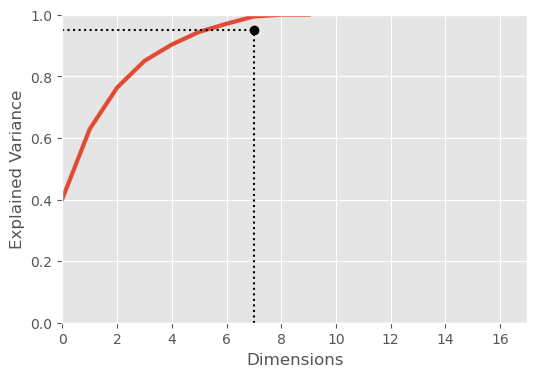

In [74]:
# Finding the n dimenstion which explain 95% variance

cumsum = np.cumsum(pca_inf.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [75]:
# Defininng machine learning model

model_lr_inf = LogisticRegression()

In [76]:
# Defining the pipeline

pipe_lr_inf = Pipeline([
    ('min_max_scaler_lr', MinMaxScaler()),
    ('PCA_lr', PCA(n_components=10)),
    ('model_lr', LogisticRegression(multi_class= 'multinomial'))
])

# creating list which containes pipeline

pipelines = [pipe_lr_inf]

In [77]:
# This code were used to see the classification report from logistic regression

pipe_lr_inf.fit(X_inf_scaled, y_inf_scaled)

y_inf_pred = pipe_lr_inf.predict(X_inf_scaled)

In [78]:
X_inf_scaled

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment
0,1012016,0.5,2,200000,2,25000,1,1,7,2,0,13.33,13.99,1674.150000,1143.56,0.0,846.33
1,1122015,2.0,1,129000,2,30000,2,1,6,2,0,18.55,26.19,2281.510000,935.49,0.0,770.81
2,1112015,10.0,1,38500,1,7000,1,1,6,2,0,16.29,34.50,8966.280006,7000.00,0.0,247.11
3,1012016,10.0,3,35000,1,2400,1,1,4,2,0,14.49,28.53,1486.800000,1070.90,0.0,82.60
4,1062014,2.0,1,88000,1,15000,2,1,4,2,0,20.99,9.63,22469.800970,15000.00,0.0,405.72
5,1122015,1.0,2,55421,1,23225,1,1,6,2,0,13.98,20.84,11091.660000,7902.82,0.0,793.55
6,1012016,10.0,3,73000,1,15000,1,1,1,1,0,5.32,24.56,447.300000,385.23,0.0,451.73
7,1012016,10.0,3,140000,2,12000,1,1,1,1,0,12.99,20.42,5651.120000,4123.51,0.0,404.27
8,1012016,10.0,3,55000,1,6400,1,1,6,1,0,8.67,10.06,2832.480000,2293.99,0.0,202.54
9,1122015,0.5,3,54000,1,1175,1,1,8,2,0,13.33,21.16,396.930000,281.04,0.0,39.78


In [79]:
y_inf_pred

array([3, 3, 3, 3, 6, 3, 3, 3, 3, 3])

In [80]:
y_pred_inf_df = pd.DataFrame(y_inf_pred, columns=['grade - prediction'])
y_pred_inf_df

,grade - prediction
0,3
1,3
2,3
3,3
4,6
5,3
6,3
7,3
8,3
9,3


In [81]:
# Concate between Inference-Set and Price's Prediction

pd.concat([data_inf, y_pred_inf_df], axis=1)

,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,purpose_cat,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,grade - prediction
0,1012016,0.5,2,200000,2,25000,1,1,7,2,0,13.33,3,13.99,1674.150000,1143.56,0.0,846.33,3
1,1122015,2.0,1,129000,2,30000,2,1,6,2,0,18.55,5,26.19,2281.510000,935.49,0.0,770.81,3
2,1112015,10.0,1,38500,1,7000,1,1,6,2,0,16.29,3,34.50,8966.280006,7000.00,0.0,247.11,3
3,1012016,10.0,3,35000,1,2400,1,1,4,2,0,14.49,3,28.53,1486.800000,1070.90,0.0,82.60,3
4,1062014,2.0,1,88000,1,15000,2,1,4,2,0,20.99,6,9.63,22469.800970,15000.00,0.0,405.72,6
5,1122015,1.0,2,55421,1,23225,1,1,6,2,0,13.98,3,20.84,11091.660000,7902.82,0.0,793.55,3
6,1012016,10.0,3,73000,1,15000,1,1,1,1,0,5.32,1,24.56,447.300000,385.23,0.0,451.73,3
7,1012016,10.0,3,140000,2,12000,1,1,1,1,0,12.99,3,20.42,5651.120000,4123.51,0.0,404.27,3
8,1012016,10.0,3,55000,1,6400,1,1,6,1,0,8.67,2,10.06,2832.480000,2293.99,0.0,202.54,3
9,1122015,0.5,3,54000,1,1175,1,1,8,2,0,13.33,3,21.16,396.930000,281.04,0.0,39.78,3


## Conclusion

The purpose of this research was to predict credit scoring from the new inference data so if the new borrower was proposing new credit application I can predict it's credit scoring by asking the features or criterias that we had to predict credit scoring. Before I build machine learning model to predict credit scoring I was checking the missing value, null, and miss-classified data dtype. After all of the features value had been make sure that were not containing missing value, null then I was doing data preprocessing to see the dataset characteristics and here were our findings:
- Proportion of bad loans were relatively small
- High income had the highest capability of payment followed by middle income and low income
- The highest total payment were at grade G, F, E, D
- Region with the lowest amount of loan was located at munster
- Region with the highest amount of loan was located at leinster
- High income borrower tend to have smaller amount of loan

The machine learning result by using multinomial logistic regression was showed that it has good precision for label A, B, C, D which have precision score 0.89, 0.75, 0.81, and 0.74 respectively. In contrast the logistic regression model tend to have bad precision for the label E, F, G which have precision score at 0.61, 0.40, and 0.00. This happened because there was a huge gap of imbalance data between each label in grade column as a target feature.